In [ ]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.




In [ ]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.



In [ ]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.




In [ ]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.




In [ ]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.




Original Data:
        Age     Income Gender  Experience
0     25.0    50000.0      M         1.0
1     27.0    54000.0      F         3.0
2      NaN    58000.0      F         5.0
3     45.0    62000.0      M         7.0
4     33.0        NaN      F         9.0
5     27.0    54000.0      F         NaN
6     27.0    54000.0      F         3.0
7   1000.0  1000000.0      M        12.0
8     29.0    56000.0      F         6.0
9     33.0    59000.0      F         4.0
10    27.0    54000.0      F         3.0

Missing values:
 Age           1
Income        1
Gender        0
Experience    1
dtype: int64

Outliers detected (True = outlier):
     Age  Income  Experience
0  False   False       False
1  False   False       False
2  False   False       False
3  False   False       False
4  False   False       False
5  False   False       False
7  False   False       False
8  False   False       False
9  False   False       False

Data after removing outliers:
      Age     Income Gender  Experience

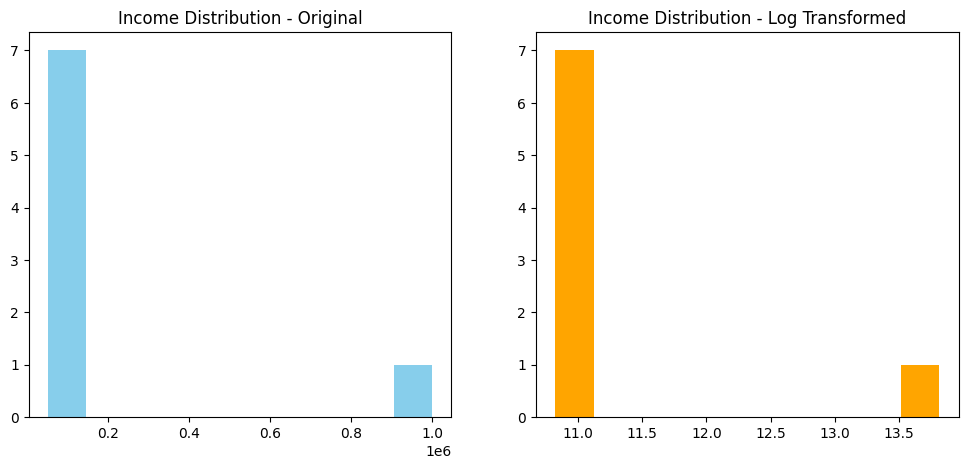


Data with new feature:
      Income  Experience  Income_per_Experience
0    50000.0         1.0           50000.000000
1    54000.0         3.0           18000.000000
2    58000.0         5.0           11600.000000
3    62000.0         7.0            8857.142857
4        NaN         9.0                    NaN
5    54000.0         NaN                    NaN
7  1000000.0        12.0           83333.333333
8    56000.0         6.0            9333.333333
9    59000.0         4.0           14750.000000

Data after KNN imputation:
      Age     Income Gender  Experience
0    25.0    50000.0      M         1.0
1    27.0    54000.0      F         3.0
2    33.0    58000.0      F         5.0
3    45.0    62000.0      M         7.0
4    33.0    57500.0      F         9.0
5    27.0    54000.0      F         6.0
7  1000.0  1000000.0      M        12.0
8    29.0    56000.0      F         6.0
9    33.0    59000.0      F         4.0


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Sample dataset with multiple issues
data = {
    'Age': [25, 27, np.nan, 45, 33, 27, 27, 1000, 29, 33, 27],
    'Income': [50000, 54000, 58000, 62000, np.nan, 54000, 54000, 1000000, 56000, 59000, 54000],
    'Gender': ['M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'F'],
    'Experience': [1, 3, 5, 7, 9, np.nan, 3, 12, 6, 4, 3]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# -----------------------
# 1. Handle Missing Values & Duplicates
# -----------------------

# Identify missing values
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# -----------------------
# 2. Handle Outliers Using Z-score
# -----------------------
# Calculate z-scores for numerical columns
numeric_cols = ['Age', 'Income', 'Experience']
z_scores = df[numeric_cols].apply(zscore)

# Set threshold for identifying outliers
threshold = 3
outliers = (np.abs(z_scores) > threshold)

print("\nOutliers detected (True = outlier):")
print(outliers)

# Remove outliers from dataframe
df_cleaned = df[~outliers.any(axis=1)]
print("\nData after removing outliers:")
print(df_cleaned)

# -----------------------
# 3. Log Transformation to reduce skewness
# -----------------------

# Before log transformation, add 1 to avoid log(0) issues
df_cleaned['Income_log'] = np.log(df_cleaned['Income'] + 1)

# Visualize Income distribution before and after log transform
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_cleaned['Income'], bins=10, color='skyblue')
plt.title('Income Distribution - Original')

plt.subplot(1,2,2)
plt.hist(df_cleaned['Income_log'], bins=10, color='orange')
plt.title('Income Distribution - Log Transformed')

plt.show()

# -----------------------
# 4. Feature Engineering: Create new feature 'Income_per_Experience'
# -----------------------
df_cleaned['Income_per_Experience'] = df_cleaned['Income'] / df_cleaned['Experience']

print("\nData with new feature:")
print(df_cleaned[['Income', 'Experience', 'Income_per_Experience']])

# -----------------------
# 5. Impute missing numerical values with KNN
# -----------------------

# Add back missing values for imputation demo
df_with_missing = df.copy()

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute only numeric columns
df_with_missing[numeric_cols] = imputer.fit_transform(df_with_missing[numeric_cols])

print("\nData after KNN imputation:")
print(df_with_missing)
